# Applied Case Studies of Machine Learning in Key Areas 1 2022/2023: Assignment 2 -  Bayesian Optimization
Deadline: Monday 21th of November 2022 9pm <br>
Filippo Pura, filippo.pura@idsia.ch

## About this assignment

In this assignment you will further deepen your understanding of Bayesian optimization.

## Submission instructions

Please write your answers, equations, and code directly in this python notebook.

The final notebook must be named name.lastname.pdf and uploaded to the iCorsi website before the deadline expires.

## How to get help
We encourage you to use the tutorials to ask questions or to discuss exercises with other students.
For further questions you can send an email to filippo.pura@idsia.ch

## Legend
* $l_1$: very-easy
* $l_2$: easy
* $l_3$: normal

# 1. Gaussian Processes

In [60]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

## 1.1. Creating a Gaussian Process instance $l_1$
Try to train a Gaussian process instance able to model the hidden function: $x_1^2 + x_2^2 = y$<br>
Create a dataset used for training in the following format: <br>
$X = [[x_{1_1}, x_{2_1}], [x_{1_2}, x_{2_2}], .., [x_{1_n}, x_{2_n}]]$ <br> 
$Y = [[y_1], [y_2], .., [y_n]]$ <br>
For simplicity, limit the $x_1$ and $x_2$ domains between -10 and 10. <br>
Hint: use the **GPy** or **sklearn** Gaussian Process regression class

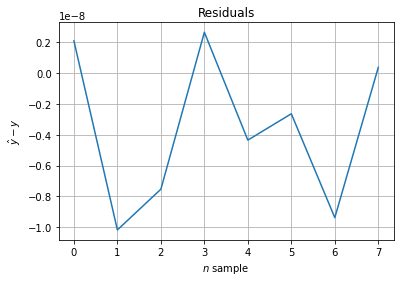

Score: 1.0
Absolute Residuals Sum: 3.924343960903798e-08


In [61]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# import chart_studio.plotly as py
import plotly.graph_objects as go

from plotly.offline import iplot

def get_dataset(n_sample):
  rng = np.random.RandomState(0)

  # Dataset with x_1, x_2 sampled from uniform distribution

  x_1 = np.random.uniform(-10, 10, n_sample)
  x_2 = np.random.uniform(-10, 10, n_sample)
  
  X = np.array([x_1,x_2]).T
  Y = x_1**2 + x_2**2
  return X, Y

def get_ground_trowth(n_sample):
  # Ground trowth with linspace sample

  x_1 = np.linspace(-10,10,n_sample,True)
  x_2 = np.linspace(-10,10,n_sample,True)

  X_1, X_2 = np.meshgrid(x_1, x_2)              
  Y_12 = X_1**2 + X_2**2

  X = np.vstack([X_1.ravel(), X_2.ravel()]).T    #  [[x1, x2], [x1,x2]] Shape : n_sample x 2
  Y = X[:,0]**2 + X[:,1]**2
  return X_1 , X_2, Y_12, X, Y



X, y = get_dataset(8)

#Gaussian Process Regression
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1e3)),n_restarts_optimizer = 10).fit(X, y)

y_hat = gpr.predict(X, return_std=False)

#Residual Regression Chart 
fig = plt.figure()
plt.plot(y_hat-y)
plt.grid(visible=True)
plt.title("Residuals")
plt.ylabel("$\hat{y}-y$")
plt.xlabel("$n$ sample")
plt.show()

regression_score = gpr.score(X, y)
print(f"Score: {regression_score}")
print(f"Absolute Residuals Sum: {sum(np.abs(y_hat-y))}")



## 1.2 Plotting the function using the model's predictions  $l_2$
Try to plot the model's predictions over the input domain. <br>
Does it reflect the original hidden function?

Hint: generate many points over the domain and evaluate them by using the model; use either a contour or a 3D plot to represent the results.



---



In [62]:
# ! pip install plotly==4.4.0

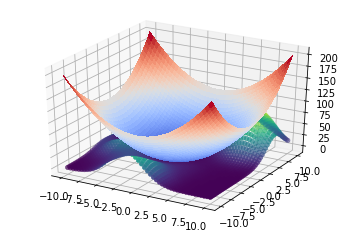

(50,)


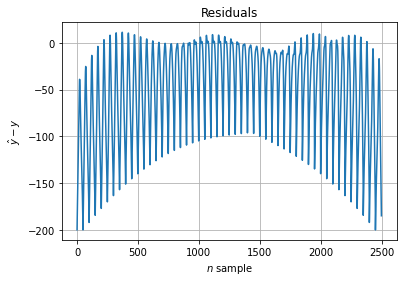

NMSE = 0.9935591311624666


In [63]:
import plotly.express as px
import plotly.graph_objects as go

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic, ConstantKernel
from sklearn.metrics import mean_squared_error

test_sample = 50
X_1_new , X_2_new, Y_12_new, X_new, Y_new = get_ground_trowth(test_sample)

Y_new_hat = gpr.predict(X_new, return_std=False) 
Y_new_hat_mesh = Y_new_hat.reshape((test_sample, test_sample))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X_1_new, X_2_new, Y_12_new,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# surf = ax.plot_surface(X_1_new, X_2_new, Y_new_hat_mesh,cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

ax.scatter(X_1_new, X_2_new, Y_new_hat_mesh, c=Y_new_hat_mesh, cmap='viridis', linewidth=0.5);


plt.show()
surface = go.Surface(x=X_1_new, y=X_2_new, z= Y_12_new)
data = [surface]
layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)
print(X_new[:test_sample,0].shape)

fig = go.Figure(data=data)
fig.add_scatter3d(x=X_1_new.flatten(), y=X_2_new.flatten(), z = Y_new_hat_mesh.flatten(), mode='markers',
                  marker=dict(size=2, color=X_1_new.flatten(),               
                              colorscale='Reds'))

# fig.show()
NMSE = np.sqrt(mean_squared_error(Y_new, Y_new_hat))/np.mean(Y_new)

fig.show(renderer="colab")
# # py.iplot(fig, filename='jupyter-parametric_plot')

# iplot(fig,filename='jupyter-parametric_plot')

#Residual Regression Chart 
fig = plt.figure()
plt.plot(Y_new_hat-Y_new)
plt.grid(visible=True)
plt.title("Residuals")
plt.ylabel("$\hat{y}-y$")
plt.xlabel("$n$ sample")
plt.show()

print(f"NMSE = {NMSE}")

## 1.3 Explore the kernels $l_3$
Gaussian processes are a probabilistic approach in predicting an hidden function through data. <br>
Correlation and similarity between the inputs of the function and the observed outputs are calculated thanks to a covariance function (or kernel). <br>
Many kernels are available to setup an instance of Gaussian process regression and usually, depending on the problem's complexity and the available number of data, their selection is the key to obtain better modelling of the hidden function. <br>
For this example lets retrain Gaussian process regressors using 10 points at most and using different kernels. <br>
Plot the model's predictions over the domain to compare their accuracy in modelling the hidden function. <br>
Which kernel from the ones you picked performed better overall? 

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic, ConstantKernel, ExpSineSquared, Matern
import pandas as pd

def estimate(X_train, y_train, kernel):
  gpr = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=10).fit(X_train, y_train)
  return gpr 

X_train, y_train = get_dataset(10)
test_sample = 100
X_1_new , X_2_new, Y_12_new, X_new, Y_new = get_ground_trowth(test_sample)

kernels=[]
kernels.append(RBF(length_scale=1, length_scale_bounds=(1e-3, 1e3)))
kernels.append(Matern())
# kernels.append(RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1e3)) + WhiteKernel(
#     noise_level=1, noise_level_bounds=(1e-5, 1e1)))
kernels.append(RationalQuadratic())
kernel_statistics = []
for kernel in kernels:
  # print(kernel)
  gpr = estimate(X_train, y_train, kernel)
  print(gpr.kernel_)
  # gpr.predict(X_new, return_std=False)
  Y_new_hat = gpr.predict(X_new, return_std=False) 
  Y_new_hat_mesh = Y_new_hat.reshape((test_sample, test_sample))
  surface = go.Surface(x=X_1_new, y=X_2_new, z= Y_12_new)
  data = [surface]
  fig = go.Figure(data=data, layout=layout)
  fig.add_scatter3d(x=X_1_new.flatten(), y=X_2_new.flatten(), z = Y_new_hat_mesh.flatten(), mode='markers',
                    marker=dict(size=2, color=X_1_new.flatten(),               
                                colorscale='Reds'))
  
  NMSE = np.sqrt(mean_squared_error(Y_new, Y_new_hat))/np.mean(Y_new)
  kernel_statistics.append(NMSE)
  # MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
  print(NMSE)

  fig.show(renderer="colab")

best_kernel = np.argmin(np.array(kernel_statistics))
print(f"The best kernel is :{kernels[best_kernel]} with nmse: {kernel_statistics[best_kernel]}")


#Just for showing a result table
stats = {
  "NMSE": {}
}
for id, statistic in enumerate(kernel_statistics):
  stats["NMSE"][str(kernels[id])] = statistic
df = pd.DataFrame(stats)

df.head()


RBF(length_scale=3.35)
0.6485912892935383


Matern(length_scale=5.22, nu=1.5)
0.5997267199987452


RationalQuadratic(alpha=0.0709, length_scale=0.369)
0.6637645971631541


The best kernel is :Matern(length_scale=1, nu=1.5) with nmse: 0.5997267199987452


NMSE
Matern(length_scale=1, nu=1.5)              0.599727
RBF(length_scale=1)                         0.648591
RationalQuadratic(alpha=1, length_scale=1)  0.663765

# 2. Bayesian Optimization


<div>
<img src="attachment:Untitled.png" width="400"/>
</div>

[testo del link](https://)We will now try to create an instance of Bayesian optimization for the same hidden function starting from scratch. <br>

> Blocco con rientro


The dataset used to train the Gaussian process must start with a single entry and we will perform Bayesian optimization steps to obtain the optimal point for the minimization of the hidden function (in this case $x_1$ = 0, $x_2$ = 0) with as few iterations as possible.

 ## 2.1. Defining the acquisition function $l_1$
The first requirement to use Bayesian optimization is to define an acquisition function. <br>
An acquisition function, given a point X, must use the Gaussian process model to obtain its prediction (the mean) together with its uncertainty (the standard deviation or variance) and join them in a single value which tells us if the point is worth sampling by combining exploitation with exploration. <br>
For this example we will use Upper Confidence Bound (UCB) as an acquisition function where part of the code is already present and is already adapted for minimization. <br>
Try to fill the left out parts to complete the acquisition function.

In [65]:
# Parameter used to control the tradeoff between exploration and exploitation
kappa = 1.0

def acquisition_UCB(X, GPR_model):
    if len(X.shape) == 1:
        X = np.expand_dims(X, axis=0)

    # If your model directly returns the standard deviation, you can omit the variance transformation
    mean, std = GPR_model.predict(X, return_std=True)
    mean = mean.flatten()
    std = std.flatten()

    
    ucb = mean + kappa * std

    return ucb

In [66]:
acquisition_UCB(X_train, gpr) 

array([109.58807954, 113.44597283, 116.93927556,  59.12706163,
        85.94139649,  97.70708124,  84.76397195, 111.71826826,
       124.19795602,  55.28261515])

## 2.2. Optimizing the acquisition function $l_3$
For the next step we need to code the optimization of the acquisition function by minimizing it to return an optimal $X_{next}$ for the current instance of the Gaussian process model.<br>
To do so, we will generate an arbitrary amount of random points and we will use the acquisition function to select the best 5 as 'anchor_points'.<br>
Anchor points are the starting points used when optimizing the acquisition function, by having more of them we assure that the optimization step is performed on more areas of the domain.<br>
From the available code, try to fill in the missing parts and include the minimization of the acquisition function in the anchor points loop. <br>
Hint: use the **SciPy** minimize method

In [67]:
from scipy.optimize import minimize

def optimize_acquisiton(GPR_model):

    n = 100
    random_points = np.random.uniform(-10, 10, (n,2))

    acquisition_values = acquisition_UCB(random_points, GPR_model)

    anchor_number = 5

    best_predictions = np.argsort(acquisition_values)[0:anchor_number]

    selected_anchors = random_points[best_predictions]

    optimized_points = []

    print(selected_anchors.shape)
    for anchor in selected_anchors:

        # Optimize the acquisition function using the current anchor point as starting point.
        # Don't forget to specify the optimization bounds between -10 and 10 for each input.
        # Store the resulting optimized points in the list 'optimized_points'.
        # Hint: use a lambda function to always pass the current GPR_model to the acquisition function when passing it to the minimization method.
        res = minimize(lambda x: acquisition_UCB(x, GPR_model), x0 = anchor, bounds = [(-10,10),(-10,10)])

        optimized_points.append(res.x)
        
            
    optimized_points = np.array(optimized_points)
    
    optimized_acquisition_values = acquisition_UCB(optimized_points, GPR_model)
    
    best = np.argsort(optimized_acquisition_values)[0]
    
    x_next = optimized_points[best]
    
    return np.expand_dims(x_next, axis=0)

In [68]:
optimize_acquisiton(gpr)


(5, 2)


array([[-3.97044792,  6.28634667]])

## 2.3. The Bayesian optimization loop $l_2$
It's now time to create the Bayesian optimization loop by using all of the functions defined before.<br>
The loop will begin with a Gaussian process regressor model trained with a single random point.<br>
At each iteration we will ask to the model to output the best possible $X_{next}$ sample thanks to the optimization of the acquisition function.<br>
The $X_{next}$ is then evaluated manually (in this case by using the hidden function) and the results will be added to the dataset. <br>
Finally, the Gaussian process model is retrained using the updated dataset, thus repeating the loop. <br>
Fill the missing parts of the final code to bring everything together as described. <br>
Try to run the iterations, does your implementation gets close to the optimum point $X = [0, 0]$?

GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10)
(5, 2)
Iteration 0:


X_next: [-9.34142483 -8.93299915]
Acquisition function value of X_next: [1.]
Measured value of X_next: [166.16739183]


GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10)
(5, 2)
Iteration 1:


X_next: [10. 10.]
Acquisition function value of X_next: [14.75044155]
Measured value of X_next: [201.]


GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10)
(5, 2)
Iteration 2:


X_next: [-10.  10.]
Acquisition function value of X_next: [11.42355945]
Measured value of X_next: [201.]


GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10)
(5, 2)
Iteration 3:


X_next: [ 10. -10.]
Acquisition function value of X_next: [10.31439423]
Measured value of X_next: [199.]


GaussianProcessRe

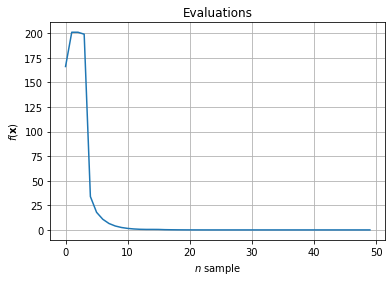

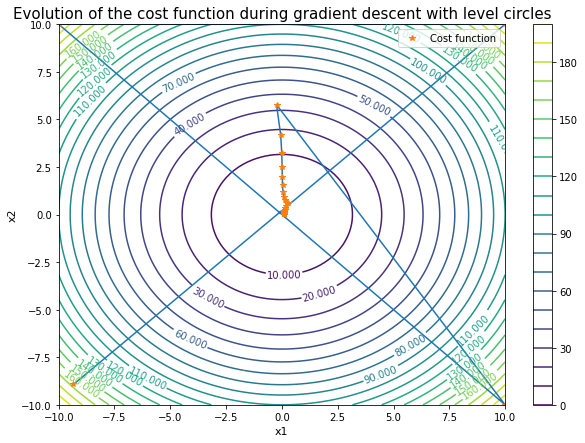

In [69]:
import warnings
warnings.filterwarnings("ignore")
def hidden_f(X): 
    return X[:, 0]**2 + X[:, 1]**2 + X[:,1]*1e-1

# Create a dataset with only one
n = 1
X_dataset = np.random.uniform(-10, 10, (n,2))
Y_dataset = hidden_f(X_dataset).reshape(-1, 1)

# Create and train here the initial GPR using the dataset above (TRAIN)
kernel = kernels[best_kernel]
GPR_model = estimate(X_dataset,Y_dataset,kernel)

Y_gpr_hat = gpr.predict(X_dataset, return_std=False) 
Y_gpr_hat_mash = Y_new_hat.reshape((test_sample, test_sample))

num_iters = 50

evals = []
x_next_cum = np.empty((num_iters,2))
for i in range(num_iters):
    print(GPR_model)  # Print how the gpr model evolves
    x_next = optimize_acquisiton(GPR_model)
    eval_x_next = hidden_f(x_next).reshape(-1, 1)
    evals.append(hidden_f(x_next))
    
    print('Iteration '+str(i)+':\n\n')
    print('X_next: ' + str(x_next.flatten()))
    print('Acquisition function value of X_next: ' + str(acquisition_UCB(x_next, GPR_model)))
    print('Measured value of X_next: ' + str(eval_x_next.flatten()) + '\n\n')
    
    X_dataset = np.append(X_dataset, x_next, axis=0)
    Y_dataset = np.append(Y_dataset, eval_x_next, axis=0)
   
    # Redefine and retrain here the GPR using the updated dataset

    GPR_model = estimate(X_dataset,Y_dataset,kernel)
    x_next_cum[i,:] = np.array(x_next)

# PLot evals respect sample (iterations) 
fig = plt.figure()
plt.plot(evals)
plt.grid(visible=True)
plt.title("Evaluations")
plt.ylabel("$f(\mathbf{x})$")
plt.xlabel("$n$ sample")
plt.show()


# Get all "x_next" [x,y] 
x = x_next_cum[:,0]
y = x_next_cum[:,1]

# Get true f in domain 
X_ground, Y_ground, Z_ground, _, _ = get_ground_trowth(100)

# Contour plot with value
fig = plt.figure(figsize = (10,7))
contours = plt.contour(X_ground, Y_ground, Z_ground, 20)
# contours = plt.contour(X_ground, Y_ground, Y_gpr_hat_mash, 20)

plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(x, y)
plt.plot(x, y, '*', label = "Cost function")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()
